In [97]:
import pandas as pd, numpy as np
import ppscore as pps
import seaborn as sns
pd.set_option('display.max_columns', None)

In [98]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [100]:
# it appears there are no missing variables
# target variable is Cover_Type
y = train.Cover_Type
train.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
9847,9848,2889,327,34,170,85,870,118,179,188,1253,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3652,3653,2326,282,25,430,253,1437,144,232,224,1073,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7781,7782,2897,83,9,474,99,3020,233,224,122,408,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8004,8005,3455,0,6,524,116,1745,212,229,155,1256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
4996,4997,3258,122,4,0,0,3607,228,236,143,3717,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7


<AxesSubplot:title={'center':'PPS matrix'}, xlabel='feature', ylabel='target'>

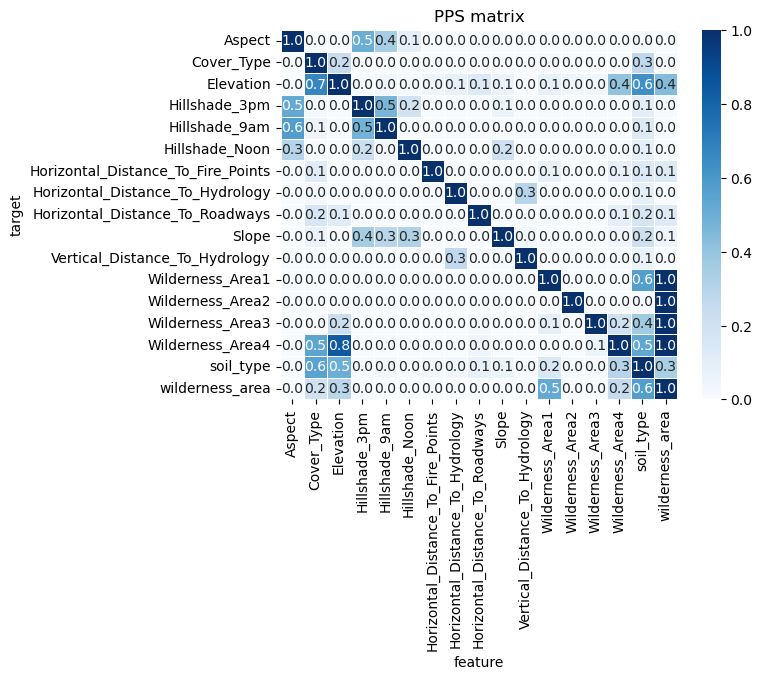

In [169]:
soil_cols = list(train.filter(regex = 'Soil_Type').columns.values)
wild_cols = list(train.filter(regex = 'Wilderness_Area').columns.values)
drop_cols = soil_cols + ['Id']
pps_matrix = pps.matrix(train.drop(columns = drop_cols))

def heatmap(df):
    ppscores = df[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")
    ax = sns.heatmap(ppscores, 
                     vmin=0, 
                     vmax=1, 
                     cmap="Blues", 
                     linewidths=0.5, 
                     annot=True,
                     fmt = '.1f'
                    )
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax

heatmap(pps_matrix)

### Observations
- Elevation is predictive of wilderness_area4
- covertype is predictive of elevation though the inverse is not true, one way relationship!
- not very helpful as covertype is out target variable

In [170]:
# Wilderness_Area and Soil_Type are one hot encoded, let's revert the encoding
def unencode_soil_wild(df):
    df['soil_type'] = 0
    for i in range(1,41):
        df['soil_type'] = df['soil_type'] + i*df[f"Soil_Type{i}"]
    df['wilderness_area'] = 0
    for i in range(1,5):
        df['wilderness_area'] = df['wilderness_area'] + i*df[f"Wilderness_Area{i}"]
    return df

In [187]:
not_features = soil_cols + ['Id','Cover_Type'] + wild_cols
not_ordinal = soil_cols + ['Id','Cover_Type','wilderness_area','soil_type'] + wild_cols
not_ordinal_features = [
    f for f in train.columns if f not in (
        not_ordinal
    )
]
features = [
    f for f in train.columns if f not in (
        not_features
    )
]

In [188]:
features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'soil_type',
 'wilderness_area']

In [189]:
# create full dataset with train and test to fit standardscaler
train = unencode_soil_wild(train)
test = unencode_soil_wild(test)
full_data = pd.concat(
        [train[features], test[features]],
        axis = 0
    )

In [200]:
# pipeline to scale numerical values
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_pipeline  = ColumnTransformer([
    ('num',StandardScaler(),features),
])

full_pipeline.fit(full_data)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Elevation', 'Aspect', 'Slope',
                                  'Horizontal_Distance_To_Hydrology',
                                  'Vertical_Distance_To_Hydrology',
                                  'Horizontal_Distance_To_Roadways',
                                  'Hillshade_9am', 'Hillshade_Noon',
                                  'Hillshade_3pm',
                                  'Horizontal_Distance_To_Fire_Points',
                                  'soil_type', 'wilderness_area'])])

In [201]:
x_train = full_pipeline.transform(train[features])
x_test = full_pipeline.transform(test[features])

In [202]:
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

In [212]:
model = ensemble.RandomForestClassifier(n_jobs = -1)
param_grid = {
    'n_estimators':list(range(10,201,10)),
    # 'max_depth':list(range(1,50,1))
}
rf_grid = GridSearchCV(estimator = model, param_grid = param_grid)
rf_grid.fit(x_train,y)
rf_preds = rf_grid.predict(x_train)
print(metrics.classification_report(y,rf_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2160
           3       1.00      1.00      1.00      2160
           4       1.00      1.00      1.00      2160
           5       1.00      1.00      1.00      2160
           6       1.00      1.00      1.00      2160
           7       1.00      1.00      1.00      2160

    accuracy                           1.00     15120
   macro avg       1.00      1.00      1.00     15120
weighted avg       1.00      1.00      1.00     15120



In [213]:
rf_grid.best_params_

{'max_depth': 48, 'n_estimators': 180}

In [216]:
model = ensemble.RandomForestClassifier(n_jobs=-1,n_estimators=180)
model.fit(x_train,y)


RandomForestClassifier(n_estimators=180, n_jobs=-1)

In [217]:
model.feature_importances_

array([0.25178425, 0.05003988, 0.03204794, 0.06491073, 0.05164363,
       0.09936975, 0.05569676, 0.04377176, 0.04244884, 0.07997917,
       0.16541719, 0.06289011])

In [214]:
rf_test_preds = rf_grid.predict(x_test)
sub_rf = pd.DataFrame({
    'Id':test.Id,
    'Cover_Type':rf_test_preds
})
sub_rf.to_csv('submissions/rf_submission.csv',
              index = False)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1,50,1))
}
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid)
knn_grid.fit(x_train, y)
knn_preds = knn_grid.predict(x_train)
print(metrics.classification_report(y,knn_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2160
           3       1.00      1.00      1.00      2160
           4       1.00      1.00      1.00      2160
           5       1.00      1.00      1.00      2160
           6       1.00      1.00      1.00      2160
           7       1.00      1.00      1.00      2160

    accuracy                           1.00     15120
   macro avg       1.00      1.00      1.00     15120
weighted avg       1.00      1.00      1.00     15120



In [45]:
knn_test_preds = knn_grid.predict(x_test)
sub_knn = pd.DataFrame({
    'Id':test.Id,
    'Cover_Type':knn_test_preds
})
sub_knn.to_csv('submissions/knn_submission.csv',
              index = False)

In [181]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_jobs = -1,
    booster = 'gbtree',
    use_label_encoder = False
)
param_grid = {
    "max_depth": list(range(1,15,1)),
    "n_estimators":list(range(10,201,10))
}
xgb_grid = GridSearchCV(estimator = model, param_grid = param_grid)
xgb_grid.fit(x_train,(y-1),eval_metric='auc')
xgb_preds = xgb_grid.predict(x_train)
print(metrics.classification_report((y-1),xgb_preds))
print(xgb_grid.best_params_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2160
           3       1.00      1.00      1.00      2160
           4       1.00      1.00      1.00      2160
           5       1.00      1.00      1.00      2160
           6       1.00      1.00      1.00      2160

    accuracy                           1.00     15120
   macro avg       1.00      1.00      1.00     15120
weighted avg       1.00      1.00      1.00     15120

{'max_depth': 12, 'n_estimators': 90}


In [183]:
xgb_test_preds = xgb_grid.predict(x_test)
sub_xgb = pd.DataFrame({
    'Id':test.Id,
    'Cover_Type':(xgb_test_preds + 1)
})
sub_xgb.to_csv('submissions/xgb_submission.csv',
              index = False)

In [53]:
from sklearn.svm import SVC

model = SVC()
param_grid = {
    "kernel": ["linear","rbf"],
    "C":[0.1,1,10]
}
svc_grid = GridSearchCV(estimator = model, param_grid = param_grid)
svc_grid.fit(x_train,y)
svm_preds = svc_grid.predict(x_train)
print(metrics.classification_report(y,svm_preds))

              precision    recall  f1-score   support

           1       0.75      0.76      0.76      2160
           2       0.76      0.64      0.69      2160
           3       0.73      0.69      0.71      2160
           4       0.86      0.95      0.90      2160
           5       0.84      0.89      0.87      2160
           6       0.74      0.76      0.75      2160
           7       0.93      0.95      0.94      2160

    accuracy                           0.81     15120
   macro avg       0.80      0.81      0.80     15120
weighted avg       0.80      0.81      0.80     15120



In [54]:
svm_test_preds = svc_grid.predict(x_test)
sub_svm = pd.DataFrame({
    'Id':test.Id,
    'Cover_Type':svm_test_preds
})
sub_svm.to_csv('submissions/svm_submission.csv',
              index = False)

In [50]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(x_train,y)
nn_preds = nn.predict(x_train)
print(metrics.classification_report(y,nn_preds))

              precision    recall  f1-score   support

           1       0.65      0.67      0.66      2160
           2       0.60      0.49      0.54      2160
           3       0.53      0.38      0.44      2160
           4       0.75      0.86      0.80      2160
           5       0.76      0.80      0.78      2160
           6       0.55      0.63      0.59      2160
           7       0.85      0.92      0.88      2160

    accuracy                           0.68     15120
   macro avg       0.67      0.68      0.67     15120
weighted avg       0.67      0.68      0.67     15120



/Users/lucasshwed/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [51]:
nn_test_preds = nn.predict(x_test)
sub_nn = pd.DataFrame({
    'Id':test.Id,
    'Cover_Type':nn_test_preds
})
sub_nn.to_csv('submissions/nn_submission.csv',
              index = False)

In [125]:
model = SVC(probability = True)
param_grid = {
    "kernel": ["linear","rbf"],
    "C":[0.1,1,10]
}
svc_grid = GridSearchCV(estimator = model, param_grid = param_grid)
from sklearn.ensemble import VotingClassifier 
est_ensemble = VotingClassifier(estimators=[
    #('nn', nn),
    # ('lr', lr_model), 
    ('xgb', xgb_grid),
    ('rf', rf_grid),
    # ('knn', knn_grid),
    # ('svc', svc_grid)
],
                                voting='soft',
                                weights=[1,1])
est_ensemble

VotingClassifier(estimators=[('xgb',
                              GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                                   booster='gbtree',
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   enable_categorical=False,
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   min_child_weight=None,
                                                                   mis...
                                                                   verbosity=None),
                                           param_grid={'max_depth': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10, 11,
                                                                     12, 13,
                                                                     14],
                                                       'n_estimators': [10, 20,
                                                                        30, 40,
                                                                        50, 60,
                                                                        70, 80,
                                                                        90, 100,
                                                                        110,
                                                                        120,
                                                                        130,
                                                                        140,
                                                                        150,
                                                                        160,
                                                                        170,
                                                                        180,
                                                                        190,
                                                                        200]})),
                             ('rf',
                              GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                           param_grid={'n_estimators': [10, 20,
                                                                        30, 40,
                                                                        50, 60,
                                                                        70, 80,
                                                                        90, 100,
                                                                        110,
                                                                        120,
                                                                        130,
                                                                        140,
                                                                        150,
                                                                        160,
                        

In [126]:
est_ensemble.fit(x_train,y)
ens_pred = est_ensemble.predict(x_train)

[11:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

In [127]:
ens_test_preds = est_ensemble.predict(x_test)
sub_ens = pd.DataFrame({
    'Id':test.Id,
    'Cover_Type':ens_test_preds
})
sub_ens.to_csv('submissions/ens_submission.csv',
              index = False)